# Exercice 2 - Time series in machine learning: Identify a user's significant points of interests.


Here we have a real life use case of an application used by real users. 

We have **GPS positions** of users over time, as well as their **checkins**, which means they communicated to the app that they were at a specific place, called **point of interest**

Run the code below to initialize the exercice.

In [26]:
%run util.py

df_points, df_pois, df_checkins = load_transform_files()

df_points = load_df(file_path='df_points')
df_pois = load_df(file_path='df_pois')
df_checkins = load_df(file_path='df_checkins')

There are 3 datasets:

- GPS positions for various users over time (**df_points**)

- Checkins of those users in various places (**df_checkins**)

- A list of various Points of interest (**df_pois**) in many places

**The aim is to train an algorithm that can infer if a user is moving or not, and if not, identify the most likely POI he or she has stopped at.**

**You can visualize the first 5 lines of each of the three dataframes.**

In [27]:
df_points.head()

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,minute,second,week_day
0,1414.0,48.866839,2.356633,1.484216e+09,u-1,2017-01-12 10:15:58.321185000,2017,1,12,10,15,58,3
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502123000,2017,1,12,10,15,58,3
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771187000,2017,1,12,10,15,59,3
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834000,2017,1,12,10,16,1,3
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239000,2017,1,12,10,16,2,3


In [4]:
df_pois.head()

,id,latitude,longitude,name,opening_hours,rating,utc_offset
0,ChIJa6LNPgpu5kcRhgsb7MbmHw8,48.871987,2.366609,PRUNE DE NUIT,"{'0': [], '1': [], '2': [], '3': [], '4': [], ...",4.8,60
1,ChIJaVQu_JBx5kcRJfHbsRGxRB0,48.828229,2.350144,Cafe du Commerce,"{'0': [{'_1': 12.0, '_2': 15.0}, {'_1': 19.0, ...",3.8,60
2,ChIJ773XIjRu5kcRsQxQXK-vgjc,48.872883,2.329033,Ce 9,"{'0': [], '1': [], '2': [], '3': [], '4': [], ...",0.0,60
3,ChIJ75q8H_hC5kcRyqJmeICPr2Y,49.048217,2.336252,Morocco Restaurant,"{'0': [{'_1': 12.0, '_2': 14.5}], '1': [], '2'...",3.7,60
4,ChIJQ64x_xVu5kcRSExgSm4ySNA,48.871537,2.345781,Okinawa Sushi,"{'0': [{'_1': 19.25, '_2': 23.0}], '1': [{'_1'...",3.6,60


In [5]:
df_checkins.head()

,endTimestamp,id,latitude,longitude,name,startTimestamp,user_uuid,start_datetime,end_datetime
0,1.485174e+09,ChIJET4koxdu5kcRDqbgGzGqwgQ,48.867692,2.347732,Frenchie To Go,1.485173e+09,u-1,2017-01-23 11:56:08,2017-01-23 12:15:42
1,1.484226e+09,ChIJN555Og5u5kcRjcUnjYZH6DQ,48.869159,2.357743,Ciacco,1.484223e+09,u-1,2017-01-12 12:13:55,2017-01-12 13:03:42
2,1.484744e+09,ChIJGa1T4RFu5kcRKOUy9OJRE-Y,48.870127,2.356441,Osè African Cuisine,1.484739e+09,u-1,2017-01-18 11:30:22,2017-01-18 12:46:57
3,1.487078e+09,ChIJN555Og5u5kcRjcUnjYZH6DQ,48.869159,2.357743,Ciacco,1.487076e+09,u-1,2017-02-14 12:32:55,2017-02-14 13:20:29
4,1.482457e+09,ChIJlyZ5jhNu5kcRbdaOx1mZ5Ws,48.872752,2.351954,Farago,1.482438e+09,u-2,2016-12-22 20:26:16,2016-12-23 01:40:20


# Description and plots of the data

Run the code below to config plot.

In [6]:
#Plot config
style.use('ggplot')
fontsize = 17
params = {'axes.labelsize': fontsize + 2,
          'font.size': fontsize,
          'legend.fontsize': fontsize,
          'xtick.labelsize': fontsize,
          'ytick.labelsize': fontsize}
plt.rcParams.update(params)

**Write a function to plot the trajectories for each users, given their latitude and longitude. Plot.**

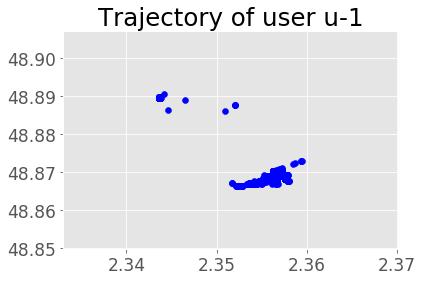

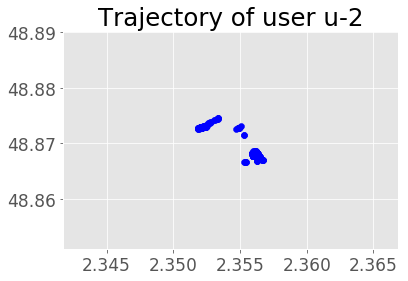

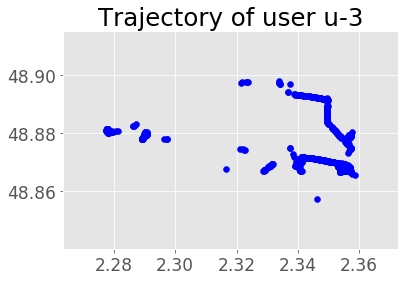

In [7]:
users_shortlist  = ['u-1','u-2','u-3']

def plot_data(df_points):
    for user in users_shortlist:
        plt.figure()
        sub_df = df_points[df_points["user_uuid"] == user]
        plt.scatter(sub_df['longitude'], sub_df['latitude'], c='b')
        plt.title("Trajectory of user {}".format(user))
    plt.show()
    
plot_data(df_points)

The function below builds a figure that can then be displayed by "mplleaflet". Import the package "mplleaflet".

Make sense of the function and use it visualize the movements of user u-2.

In [8]:
import mplleaflet

def plot_data_mpl(df_points, user_uuid, color_col=None):
    fig=plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    sub_df = df_points[df_points["user_uuid"] == user_uuid]
    
    sub_df.head()
    
    if not color_col:
        ax.scatter(sub_df['longitude'], sub_df['latitude'], c="b")
    else:
        ax.scatter(sub_df['longitude'], sub_df['latitude'], c=sub_df[color_col])
    return fig

fig = plot_data_mpl(df_points, "u-2")
mplleaflet.display(fig)

# The Haversine Distance

When calculating a distance between two points from latitude and longitude data, we need to consider that the earth is not flat, but spherical. 

The "Haversine Distance" does so by taking into account the curvature of the earth. Those geometrical calculations are combined in the "haversine" package.

**You can import the haversine package here**

In [9]:
from haversine import haversine

Create a function `get_haversine` that calculates the haversine distance between two observations of `df_points`.

In [10]:
def get_haversine(a, b):
    return haversine((a['latitude'], a['longitude']), (b['latitude'], b['longitude']))

# Filtering dataset

The feature `horizontal_precision` has some outliers. Filter out the dataset to keep only the rows in which `horizontal_precision` is less than 100.

In [11]:
horizontal_precision_threshold = 100
df_to_out = df_points['horizontal_precision'] > horizontal_precision_threshold
df_points = df_points[~df_to_out]

df_points.head()

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,minute,second,week_day
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502123000,2017,1,12,10,15,58,3
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771187000,2017,1,12,10,15,59,3
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834000,2017,1,12,10,16,1,3
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239000,2017,1,12,10,16,2,3
5,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:03.594202000,2017,1,12,10,16,3,3


# Feature engineering

Feature engineering is the process of deriving new features from existing ones. In the section bordered with #'s in code below, engineer the following features - 

**For every user**
- Time difference between two consecutive positions of this user
- Latitude difference between two consecutive positions of this user
- Longitude difference between two consecutive positions of this user
- Latitude Velocity/Speed between two consecutive positions of this user
- LongitudeVelocity/Speed between two consecutive positions of this user

In [12]:
df_points["times_cen"] = np.nan
df_points["time_diff"] = np.nan
df_points["latitude_diff"] = np.nan
df_points["longitude_diff"] = np.nan
df_points["v_lat"] = np.nan
df_points["v_lon"] = np.nan


for user_uuid in df_points.user_uuid.unique():
    mask_user = df_points["user_uuid"] == user_uuid
    df_user = df_points[mask_user]
    df_user['times_cen'] = standardize(df=df_user, field='longitude')
    
    ############
    
    df_user['time_diff'] = df_user['timestamp'].diff().fillna(0)
    df_user["latitude_diff"] = df_user["latitude"].diff().fillna(0)
    df_user["longitude_diff"] = df_user["longitude"].diff().fillna(0)
    df_user['v_lat'] = (df_user['latitude_diff'] / df_user['time_diff']).fillna(0)
    df_user['v_lon'] = (df_user['longitude_diff'] / df_user['time_diff']).fillna(0)

    ############
    
    df_points.loc[mask_user] = df_user

/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Visualize the first 5 rows of the features that you just engineered.

In [13]:
df_points[['time_diff','latitude_diff','longitude_diff','v_lat','v_lon']].head()

,time_diff,latitude_diff,longitude_diff,v_lat,v_lon
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.269064,0.000023,-0.000039,0.000018,-0.000031
3,1.847648,0.000005,-0.000008,0.000003,-0.000005
4,0.975405,0.000000,0.000000,0.000000,0.000000
5,0.999963,0.000000,0.000000,0.000000,0.000000


# DBSCAN

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a fancy/scary name for a clustering algorithm based on geolocalization.

Sklearn has a DBSCAN package. Import it.

In [14]:
from sklearn.cluster import DBSCAN

Within the below function, initiate a DBSCAN with the following parameters:
    - Epsilon  (0.05 / Earth radius in km)
    - 5 minimum samples
    - 'haversine' metric
    - 'ball_tree' algorithm
    
Try make sense of the rest of the code then move on.

In [15]:
def get_clustering_res_dbscan(data=None, eps=0.05/EARTH_RADIUS, min_samples = 5):
    
    ##########
    
    # Initiate DBSCAN
    dbs = DBSCAN(eps=0.05/EARTH_RADIUS, min_samples=5,
                 algorithm='ball_tree', metric='haversine')
    
    ##########
    
    clusters = dbs.fit_predict(np.radians(data))

    dict_res = {}
    dict_res['centroids'] = [0, 0]
    dict_res['n_cluster'] = len(np.unique(clusters))
    dict_res['model_clust'] = dbs
    clusters[np.where(clusters == -1)] = -100  # Non clustered data
    clusters = [int(i) for i in clusters]
    dict_res['cluster'] = clusters
    return dict_res

# This runs the DBSCAN algorithm on the movements of user 2
dict_res_u2 = get_labels_points(df_points, "u-2", fields=['latitude', 'longitude', 'times_cen'])

df_u2 = dict_res_u2["df_points"]

fig = plot_data_mpl(df_u2,"u-2","label")

**Plot the clustered movements of user 2 on a map**

In [16]:
mplleaflet.display(fig)

# Discriminate moving and stopping candidates

We now have a first spatial (and possibly temporal) clustering of our datapoints.The next idea is to define a function that takes a cluster of points into consideration, and evaluates if the user stays **long enough** inside it. If so, it is a stop point, else not.

Have a look at the function below. One of its arguments, `min_time_clust`, defines the minimum time to be spent in a cluster for it to be considered a stop.

Complete the function so that:

- If user spends less than the minimum time in cluster, he is considered moving
    - set the user as being moving (stop_move=1)
- If user spends more than the minimum time in cluster, he is considered stopping
    - set the user as stopped (stop_move=0)

In [17]:
MIN_STOP_TIME = 60
MIN_STOP_PROP = 0.8
def label_stop_or_not(df_points=None, user_id=None, min_time_clust=None):
    """Given a clustering, will look the time elapsed
    between entering and exiting cluster.
    if too small : moving.
    else: will request check-in,
    assumes it has  a label
    stop_move = 1 if moves, 0 if stop"""
    """
    Heuristich function, that labels GPS points moving (1) or stop (0), looking
    sequentially at time difference between points.
    We have to do this because a user may do several "visits" in one cluster.
    Inputs:
    --------------------
    df_points: pandas dataframe, gps coordinates for users.
    user_id: user to perform algo on, str. exp: 'u-1'
    min_time_clust: float, minimum time in second to spend in a cluster to be
    labeled stopped.
    Outputs:
    --------------------
    """

    if user_id not in df_points['user_uuid'].unique():
        raise ValueError("Should select appropriate user_id")
    mask_user = df_points['user_uuid'] == user_id
    df_user = df_points[mask_user]
    # prev_row = dfu.ix[0]
    current_label = df_user['label'].values[0]
    time_elapsed = 0
    indx_start = df_user.index[0]
    df_user['stop_move'] = 0
    # Take in consideration previous cluster
    for indx, row in df_user.iterrows():
        if row['label'] != current_label:  # we left a cluster
            # print('changin of clster')
            # print("changin cluster (time elapsed: {})".format(time_elapsed))
            if time_elapsed < min_time_clust:
                # print("not enough time in it !=> moving")
                # Not enough time in cluster
                df_user.loc[indx_start: indx - 1, 'stop_move'] = 1
                df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
            else:
                # print("enough time in it: stop")
                # Enough time in cluster
                df_user.loc[indx_start: indx - 1, 'stop_move'] = 0
                df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
            time_elapsed = 0
            indx_start = indx
            current_label = row['label']
        else:  # We stay in same cluster
            time_elapsed += row['time_diff']
    # End: label last clust:
    if time_elapsed < min_time_clust:
        df_user.loc[indx_start: indx - 1, 'stop_move'] = 1
        df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
    else:
        df_user.loc[indx_start: indx - 1, 'stop_move'] = 0
        df_user.loc[indx_start: indx - 1, 'time_elapsed'] = time_elapsed
    df_points.loc[mask_user, 'stop_move'] = df_user['stop_move']
    df_points.loc[mask_user, 'time_elapsed'] = df_user['time_elapsed']
    return df_points



In the function below, set the minimum time spent in cluser to be considered as 1 minute.

In [18]:
%run util2.py

In [19]:
df_points, dict_description_clusters = stop_places_labelling(df_points=df_points, user_id="u-2",
                                                             quantile_diameter_cluster=0.99,
                                                             min_time_clust=MIN_STOP_TIME)

/Users/benjaminauzanneau/Desktop/lewagonexo/02-place-detection 3/util.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_user['stop_move'] = 0
/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [20]:
df_points.head()

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,...,week_day,times_cen,time_diff,latitude_diff,longitude_diff,v_lat,v_lon,label,stop_move,time_elapsed
1,65.0,48.868086,2.356140,1.484216e+09,u-1,2017-01-12 10:15:58.502123000,2017,1,12,10,...,3,0.227940,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,65.0,48.868110,2.356101,1.484216e+09,u-1,2017-01-12 10:15:59.771187000,2017,1,12,10,...,3,0.214384,1.269064,0.000023,-0.000039,0.000018,-0.000031,NaN,NaN,NaN
3,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:01.618834000,2017,1,12,10,...,3,0.211429,1.847648,0.000005,-0.000008,0.000003,-0.000005,NaN,NaN,NaN
4,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:02.594239000,2017,1,12,10,...,3,0.211429,0.975405,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,48.0,48.868115,2.356093,1.484216e+09,u-1,2017-01-12 10:16:03.594202000,2017,1,12,10,...,3,0.211429,0.999963,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


# Classification: Mapping stop points to POIs

Now that we have potential candidates of POIS we need to map them with a potential place.
The process will be :
Cluster of stop point => query of potential matching places (given radius of the cluster for instance) => best matching candidate.

To train our model: we will use the checkins as similar to the clusters, giving a ground truth of presence.

## Optional first part: train a classifier

In [21]:
#Import the model selection package.
import sklearn.model_selection as ms
import sklearn.linear_model as lm

#Load prediction features (for later) (GIVEN, dont bother.)
def get_prediction_features():
    """
    Loads list of prediction features, hardcoded to ensure correct
    feature engineering.

    Outputs:
    --------------------
    list of strings. features to predict on.
    """
    lines = []
    with open(os.path.join(BASE_PATH_DATA,"prediction_features")) as file:
        for line in file:
            line = line.strip()
            lines.append(line)
    return lines

prediction_features_classifier = get_prediction_features()

###  Feature engineering of the df_pois, and some tooling (Can be skipped to load the results)

In [22]:
##Very optional: given the shape of the opening hours of a place, create new dummy features to indicate whether a place is 
#open at a given day / hour.
##Here are Some feature engineering, we create opening hours features, adding the number of checkins per user on given pois and so on.

import ast


def get_date_ts_from_str(date_str=None):
    """From a string of date, gives back date ts"""
    return datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

def get_dict_open_hours(poi=None):
    """
    Subfunction. In order to get dummy variables, first
    processes a dictionnary of opening times.
    """
    opening_hours = ast.literal_eval(poi['opening_hours'])
    dict_open_hours = {}
    days_to_try = [int(i) for i in opening_hours.keys()]
    days_close = [i for i in range(7) if i not in days_to_try]
    #print("days close: {}".format(days_close))
    for ind_day in days_to_try:
        dict_open_hours[ind_day] = {}
        for ind_hour in range(24):
            # try:
            is_open = 0
            if len(opening_hours[str(ind_day)]) > 0:
                for open_spots in opening_hours[str(ind_day)]:
                    if int(open_spots['_1']) <= ind_hour <= int(open_spots['_2']):
                        is_open = 1
            dict_open_hours[ind_day][ind_hour] = is_open
    for ind_day in days_close:
        dict_open_hours[ind_day] = {}
        for ind_hour in range(24):
            dict_open_hours[ind_day][ind_hour] = 0
        # except:
            # print("error")
            # pass
    #assert sum(days_to_try.extend(day_close)) == 19
    return dict_open_hours

def process_opening_hours_one_poi(poi=None):
    """
    Subfunction to get dummy variables on a single POI.
    """
    dict_open_hours = get_dict_open_hours(poi=poi)
    for ind_day in range(7):
        for ind_hour in range(24):
            # All close
            poi['open_at_hour_{}_day_{}'.format(ind_hour, ind_day)] = dict_open_hours[
                ind_day][ind_hour]
    return poi


def process_opening_hours(df_pois=None):
    """
    Feature engineering of the opening hours to create dummy
    variables.
    Inputs:
    --------------------
    df_pois: dataframe of POIS raw, contening opening_hours in columns

    Outputs:
    --------------------
    df_pois_enhanced: containing new dummy variables.
    """

    for ind_day in range(7):
        for ind_hour in range(24):
            df_pois['open_at_hour_{}_day_{}'.format(
                ind_hour, ind_day)] = 0  # all close
    df_pois = df_pois.apply(process_opening_hours_one_poi, axis=1)
    return df_pois


##TOOL function.
def get_pois_open_at_checkin(poi=None, checkin_hours=None, checkin_days=None):
    """
    Given a poi and checkin hours and days, returns if POI is open at given time (boolean)

    """
    is_open_at_checkin_l = [0, ]
    for ind_day in checkin_days:
        for ind_hour in checkin_hours:
            is_open_at_checkin_l.append(
                poi['open_at_hour_{}_day_{}'.format(ind_hour, ind_day)])
    is_open_at_checkin = max(is_open_at_checkin_l)
    return is_open_at_checkin



def get_matrix_checkins(df_checkins, user_list):
    """
    Inputs:
    --------------------
    df_checkins: history of checkins
    user_list: users to consider (list of str)
    Outputs:
    --------------------
    matrix: pd.dataframe with (user_id, poi_id) and number of checkins seen.
    """
    gb = df_checkins.groupby(['name', 'user_uuid'],
                             as_index=False).agg({'id': 'count'})
    matrix = pd.pivot_table(
        data=gb, columns='name', index='user_uuid')['id']
    for user_id in user_list:
        if user_id not in matrix.T.columns:
            matrix.ix[user_id, :] = 0
    matrix = matrix.fillna(0)
    return matrix

def enhance_pois(df_pois, df_checkins, user_list):
    """We expand the df pois indicating the number of previous checkins 
    realized there per user, and similar informations"""
    
    matrix_checkins = get_matrix_checkins(df_checkins, user_list)
    
    missing = list(set(df_pois['name'].unique()).difference(
    set(matrix_checkins.columns)))
    for name in missing:
        matrix_checkins[name] = 0
    
    #Global checkins features
    for user_id in user_list:
        df_pois['nb_checkins_by_user_{}'.format(user_id)] = df_pois.apply(
            lambda x: matrix_checkins[x['name']][user_id], axis=1)
    df_pois['nb_checkins_total'] = df_pois.apply(
        lambda x: matrix_checkins[x['name']].sum(), axis=1)
  
    return df_pois

In [23]:
##Feature engineering to transform the data frame of df_pois.
##Alternatively just load it.


df_pois_enhanced = process_opening_hours(df_pois)
df_pois_enhanced = enhance_pois(df_pois, df_checkins,user_list)
df_pois_enhanced.to_csv(os.path.join(BASE_PATH_DATA_DF, "df_pois_enhanced.csv"))

df_pois_enhanced = load_df(file_path='df_pois_enhanced')

NameError: name 'user_list' is not defined

In [ ]:


#First, compute two methods: one that, given a dataset of checkins, computes the number of checkins per user.
#The second, that given a checkin and a dataframe of POIs, computes the list of "candidates" POIs in a radius, and label
#


def get_relevant_POIS(df_pois, checking_req=None, nb_pois=50, radius=0.150):
    """
    Given a checkin, gives back list of relevant POIs to consider. (the ones nearby), we 
    let the model learn if opening hours are relevant.
    Inputs:
    --------------------
    df_pois: dataframe of all pois.
    checkin_req: dict containing latitude, longitude keys
    nb_pois: max number of POIs candidates to return.
    radius: radius of search of POIs (km)
    Outputs:
    --------------------
    df_pot: dataframe of 50 first potential POIs
    """
    lambda_dist = lambda x: get_haversine(a={'latitude': checking_req[
                                          'latitude'], 'longitude': checking_req['longitude']}, b=x)
    df_pois['havers_dist'] = df_pois.apply(lambda_dist, axis=1)
    df_pot = df_pois.sort_values(
        by='havers_dist', axis=0).reset_index(drop=True)
    df_pot = df_pot.head(50)
    return df_pot


In [72]:
 #Split df checkins into learning and test. Can be done splitting by user or not.

df_checkins_training, df_checkins_validation = ms.train_test_split(
    df_checkins, test_size=0.2)
df_checkins_training = df_checkins_training.reset_index()
df_checkins_validation = df_checkins_validation.reset_index()

In [24]:
#now train a classifier given the POIS and the checkins.
#For each checkin, you have to find the corresponding POIs candidate in a certain radius.
#Then match the good one labeling it with 1.
#The other are labeled with 0 and contribute to making false examples.
#We will use a simple logistic regression for the classifier.

 
#them with the correct ground truth. It should output a dataframe, with each pois and groundtruth.


##Tool function to add features to POIs concerned by checkin:

def get_candidates_POIS_with_checkin_features(df_pois,
                                                        checking_req,
                                                        nb_pois,
                                                        radius,
                                                        checkin_hours,
                                                        checkin_days):
    
    df_pot = get_relevant_POIS(
        df_pois=df_pois, checking_req=checking_req, nb_pois=nb_pois, radius=radius)
    df_pot['is_open_at_checkin'] = df_pot.apply(
    lambda x: get_pois_open_at_checkin(poi=x, checkin_hours=checkin_hours,
                                       checkin_days=checkin_days), axis=1)
    
    return df_pot


##Now using previous functions, compute the learning dataset to train our classifier.
def get_dataset(df_checkins=None, df_pois=None, radius=None, user_list=None):
    """
    Given dataframe of checkins and list of POIS, returns a dataset of selected POIs
    labeled with groundtruth from df_checkins.
    Inputs:
    --------------------
    df_checkins : pandas dataframe ground truth of checkins made by users.
    df_pois: dataframe of POIs
    radius: radius of search of POIs from checkin location.
    user_list: users to consider to created matrix of checkins for feature engineering.
    Outputs:
    --------------------
    list_learning_sets: list of dataframe. For each, only one is labeled checkin
    other are 0. They are enhanced with computed features.
    learning_data_set_df: pandas dataFrame. Concatenation of previous dataset, for
    classification learning and evaluation.
    """
    user_list = df_points_labeled['user_uuid'].unique()
    
    #target_var = 'checkin'
    matrix_checkins = get_matrix_checkins(df_checkins=df_checkins, user_list=user_list)
    
    learning_data_set = []
    for row, checkin in df_checkins.iterrows():
        checking_req = {'latitude': checkin[
            'latitude'], 'longitude': checkin['longitude'], }
        start_checkin_date = get_date_ts_from_str(
            date_str=checkin['start_datetime'])
        end_checkin_date = get_date_ts_from_str(
            date_str=checkin['end_datetime'])
        start_checkin_hour = start_checkin_date.hour
        start_checkin_day = start_checkin_date.weekday()
        end_checkin_hour = end_checkin_date.hour
        end_checkin_day = end_checkin_date.weekday()
        checkin_hours = list(range(start_checkin_hour, end_checkin_hour + 1))
        checkin_days = list(range(start_checkin_day, end_checkin_day + 1))
        
        enhanced_pois = get_candidates_POIS_with_checkin_features(df_pois=df_pois,
                                                        checking_req=checking_req,
                                                        nb_pois=50, radius=RADIUS_TRAINING,
                                                        checkin_hours=checkin_hours,
                                                        checkin_days=checkin_days)
        # Labelize the training set
        assert 'checkin' not in enhanced_pois.columns
        enhanced_pois['checkin'] = 0
        enhanced_pois.loc[enhanced_pois['id'] ==
                          checkin['id'], 'checkin'] = 1
        # target = enhanced_pois[target_var]
        # enhanced_pois = enhanced_pois[prediction_features]
        learning_data_set.append(enhanced_pois)
        list_learning_sets = learning_data_set
        learning_data_set_df = pd.concat(learning_data_set)
    return list_learning_sets, learning_data_set_df



def train_classifier_checkins(df_pois=None, df_checkins_training=None,
                              training_radius=None,
                              user_list=None):
    """
    Trains a classifier on checkins.
    Inputs:
    --------------------
    df_pois: dataframe of POIs informations.
    df_checkin_training: dataframe of checkins to consider in training.
    training_radius: radius of POIs to consider in training.
    model: str, only logit for logistic regression implemented so far.
    prediction feature: list of str, feature to learn and predict on.
    user_list: list of str, users considered for learning (for checkin matrix).
    Outputs:
    --------------------
    dict_summary_learning: dict with predictor, learning score, checkin score.
    """
    dict_summary_learning = {}
    df_checkins_learning = df_checkins_training
    list_learning_sets, learning_data_set_df = get_dataset(
        df_checkins=df_checkins_learning, df_pois=df_pois, radius=training_radius, user_list=user_list)

    
    predictor = lm.LogisticRegressionCV(fit_intercept=False)
    predictor.fit(X=learning_data_set_df[
                  prediction_features_classifier], y=learning_data_set_df['checkin'])
    predictions = predictor.predict(
        X=learning_data_set_df[prediction_features_classifier])
    # Checkin underrepresented! AUC..
    score_classif = predictor.score(
        X=learning_data_set_df[prediction_features_classifier], y=learning_data_set_df['checkin'])
    

    dict_summary_learning['predictor'] = predictor
    dict_summary_learning['score_classif'] = score_classif
    dict_summary_learning['predictions_classif'] = predictions
    dict_summary_learning['training_df'] = learning_data_set_df
    dict_summary_learning['list_training_df'] = list_learning_sets

    return dict_summary_learning


In [51]:
##Finally, once we have a classification of all POIs, we need to have a matching algorithm.
## We will use the "predict_proba" function of the classifier to rank the POIs. The highest score will be
## the matched POIs. The others get 0,
## We could define other performance metrics : if we have the correct POI in the first n, we are right. Here we choose 
# n=1.

def get_score_checkin(list_sets_pois_df, predictor):
    """
    Evaluate, given a list a of potential dataframes labeled with ground truth checkin,
    the performance of the classifier. We add one to score if the checkin suggested was actually 
    selected.
    We assert that ground truth labeling is correct.
    We also return other features such as checkin predicted, checkin actually chosen.
    """
    dict_res = {'dict_pred': []}
    score = 0
    for df in list_sets_pois_df:
        dict_pred = {}
        pred_proba = predictor.predict_proba(X=df[prediction_features_classifier])
        proba_checkin = pred_proba[:, 1]
        checkin_indx = np.argmax(proba_checkin)
        df['pred_proba'] = proba_checkin
        df['predicted_checkin'] = 0
        df.loc[checkin_indx, 'predicted_checkin'] = 1
        dict_pred['predicted_checkin'] = df.loc[checkin_indx]
        dict_pred['true_checkin'] = df.loc[df['checkin'] == 1]
        dict_res['dict_pred'].append(dict_pred)
        if dict_pred['predicted_checkin']['checkin'] == 1:
            assert dict_pred['predicted_checkin'][
                'id'] == dict_pred['true_checkin']['id'].values[0]
            score += 1
    dict_res['score'] = score
    dict_res['score_100'] = score / len(list_sets_pois_df) * 100
    
    return dict_res

In [74]:
##Now let us train our classifier:

RADIUS_TRAINING = 50

In [77]:

dict_summary_learning = train_classifier_checkins(df_pois=df_pois, user_list=user_list,
                                                     df_checkins_training=df_checkins_training,
                                                     training_radius=RADIUS_TRAINING)

list_validation_sets, validation_data_set_df = get_dataset(
    df_checkins=df_checkins_validation, df_pois=df_pois, radius=RADIUS_TRAINING,
    user_list=user_list)
predictor = dict_summary_learning['predictor']

dict_learning_score = get_score_checkin(list_sets_pois_df=dict_summary_learning[
    'list_training_df'], predictor=predictor)

dict_validation_score = get_score_checkin(
    list_sets_pois_df=list_validation_sets, predictor=predictor)

print("Predictor trained: learning score: {}, score_100:{} \n validation score: {}, v_score_100:{} ".format(dict_learning_score['score'],
                                                                                                            dict_learning_score[
                                                                                                                'score_100'],
                                                                                                            dict_validation_score[
                                                                                                                'score'],
                                                                                                            dict_validation_score['score_100']))

/Users/benoit/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/benoit/miniconda3/envs/p36/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Predictor trained: learning score: 130, score_100:86.09271523178808 
 validation score: 35, v_score_100:92.10526315789474 


In [85]:
##Save the results in data folder using pickle:
import pickle
with open(os.path.join(BASE_PATH_DATA,"classifier.pkl"),"wb") as f:
    pickle.dump(predictor, f)

## Classify the stop points to predict the place.

In [86]:
##If you skipped the previous part, you can load the classifier using pickle:
import pickle 
with open(os.path.join(BASE_PATH_DATA,"classifier.pkl"),"rb") as f:
    predictor = pickle.load(f)


In [88]:
def predict_a_checkin(enhanced_pois_df=None, prediction_features=None, predictor=None):
    """
    Using potential checkins, predicts a proba of checkin in each. Return most likely
    checkin and its caracteristics.
    Inputs:
    --------------------
    enhanced_pois_df: dataframe of POIs with extra features engineered.
    prediction_features: list str, features to predict on.
    predictor: trained classifier for checkin (with predict_proba method)
    Outputs:
    --------------------
    labeled enhanced pois df, and checkin predicted.
    """
    pred_proba = predictor.predict_proba(
        X=enhanced_pois_df[prediction_features])
    proba_checkin = pred_proba[:, 1]
    checkin_indx = np.argmax(proba_checkin)
    enhanced_pois_df['pred_proba'] = proba_checkin
    enhanced_pois_df['predicted_checkin'] = 0
    enhanced_pois_df.loc[checkin_indx, 'predicted_checkin'] = 1
    checkin_poi = enhanced_pois_df.loc[checkin_indx]
    return enhanced_pois_df, checkin_poi

def predict_checkins_clusters(df_points_labeled,dict_description_cluster, df_pois_preprocessed,
                              df_checkins, predictor):
    """
    Given result of stop points detection and clustering, predicts checkins
    for each cluster.
    Inputs:
    --------------------
    dict_res_macro: results of stop points and clustering detection.
    df_checkins: dataframe of checkins to consider, in order to get checkins matrix and
    feature engineer.
    predictor: previously train predictor.
    nb_pois: number maximum of POIs get back.
    min_stop_prop: minimum proportion of points labeled "stop" to consider them.
    Outputs:
    --------------------
    dict_res_macro: same dictionary with predicted checkins.
    """
    df_points_labeled = df_points_labeled
    df_points_labeled['to_label_with_poi'] = np.nan
    df_points_labeled['id_poi'] = np.nan
    df_points_labeled['name_poi'] = np.nan
    user_list = df_points_labeled['user_uuid'].unique()
    matrix_checkins = get_matrix_checkins(df_checkins=df_checkins, user_list=user_list)
    for user_id in user_list:
        indx_user = df_points_labeled['user_uuid'] == user_id
        df_user = df_points_labeled.loc[indx_user]
        for cluster_label, cluster_descr in dict_description_cluster.items():
            feat_clust = cluster_descr['dict_feat_cluster']
            indx_user_label = indx_user & (df_user['label'] == cluster_label)
            
            enhanced_pois_user = get_candidates_POIS_with_checkin_features(df_pois=df_pois_preprocessed, checking_req=cluster_descr[
                'cluster_mean'], nb_pois=50, radius=cluster_descr['cluster_radius'],
                checkin_hours=feat_clust['different_hour'],
                checkin_days=feat_clust['different_week_day'])
            
            enhanced_pois_df, checkin_poi = predict_a_checkin(
                enhanced_pois_df=enhanced_pois_user,
                prediction_features=prediction_features_classifier,
                predictor=predictor)
            cluster_descr['checkin_id'] = checkin_poi['id']
            cluster_descr['checkin_descr'] = checkin_poi
            cluster_descr['POI_selected'] = enhanced_pois_user
        #df_user.loc[df_user['labels'] == cluster_label, 'id_poi'] = checkin_poi['id']
            df_points_labeled.loc[indx_user_label,
                                  'id_poi'] = checkin_poi['id']
            df_points_labeled.loc[indx_user_label,
                                  'name_poi'] = checkin_poi['name']
            df_points_labeled.loc[indx_user_label,
                                  'id_poi'] = checkin_poi['id']
            # Take stop points into consideration
            if cluster_descr['stop_prop'] < MIN_STOP_PROP:

                df_points_labeled.loc[indx_user_label,
                                      'to_label_with_poi'] = 0
            else:
                df_points_labeled.loc[indx_user_label,
                                      'to_label_with_poi'] = 1

    return df_points_labeled, dict_description_clusters

In [89]:
df_points, dict_descr_clusters_u2 = predict_checkins_clusters(df_points,dict_description_clusters, df_pois,
                              df_checkins, predictor)

In [90]:
df_points_u2_final = df_points[df_points["user_uuid"] == "u-2"]

In [91]:
df_points_u2_final.head(50)

,horizontal_precision,latitude,longitude,timestamp,user_uuid,datetime,year,month,day,hour,...,latitude_diff,longitude_diff,v_lat,v_lon,label,stop_move,time_elapsed,to_label_with_poi,id_poi,name_poi
3685,65.0,48.868098,2.356086,1.482431e+09,u-2,2016-12-22 18:26:21.043675423,2016,12,22,18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3686,65.0,48.868101,2.356064,1.482431e+09,u-2,2016-12-22 18:27:44.049431562,2016,12,22,18,...,2.839716e-06,-2.103692e-05,3.421107e-08,-2.534393e-07,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3687,65.0,48.868101,2.356064,1.482431e+09,u-2,2016-12-22 18:27:44.050472021,2016,12,22,18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3688,65.0,48.868116,2.356057,1.482431e+09,u-2,2016-12-22 18:27:44.724220991,2016,12,22,18,...,1.527409e-05,-7.863191e-06,2.267029e-05,-1.167080e-05,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3689,65.0,48.868122,2.356054,1.482431e+09,u-2,2016-12-22 18:27:50.498947382,2016,12,22,18,...,5.815415e-06,-2.671412e-06,1.007046e-06,-4.626040e-07,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3690,65.0,48.868122,2.356054,1.482431e+09,u-2,2016-12-22 18:27:50.499844790,2016,12,22,18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3691,65.0,48.868113,2.356061,1.482431e+09,u-2,2016-12-22 18:27:57.609862089,2016,12,22,18,...,-9.144004e-06,6.629092e-06,-1.286073e-06,9.323595e-07,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3692,65.0,48.868086,2.356081,1.482431e+09,u-2,2016-12-22 18:28:00.252386332,2016,12,22,18,...,-2.616036e-05,2.056331e-05,-9.899761e-06,7.781691e-06,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3693,65.0,48.868115,2.356060,1.482431e+09,u-2,2016-12-22 18:28:05.963109016,2016,12,22,18,...,2.818168e-05,-2.099901e-05,4.934871e-06,-3.677119e-06,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
3694,65.0,48.868115,2.356060,1.482431e+09,u-2,2016-12-22 18:28:05.964151382,2016,12,22,18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,2762.577338,1.0,ChIJGZZ2SBBu5kcRQ1_-we9jSWM,Ari's Bagel
